#Type Definitions

In [2]:
type Person
    flavor::Int64 # Whether it's a type "0" or type "1" person
    x::Float64 # Position
    y::Float64   
end

Person() = Person(rand([0,1]),rand(),rand()) # Constructor

# Population is a collection of people
function initPop(N = 250)
    population = []
    for i in 1:N 
        push!(population,Person())
    end
    return population
end

initPop (generic function with 2 methods)

In [3]:
using PyPlot

# Plotting Functionality

In [ ]:
# Allows one to plot the population
function plotPop(population)
    x0 = []
    y0 = []
    
    x1 = []
    y1 = []
    for person in population
        if person.flavor == 0
            push!(x0,person.x)
            push!(y0,person.y)
        else
            push!(x1,person.x)
            push!(y1,person.y)
        end
    end
    fig = figure(figsize=(4,4))
    scatter(x0,y0,c="r")
    scatter(x1,y1) 
end

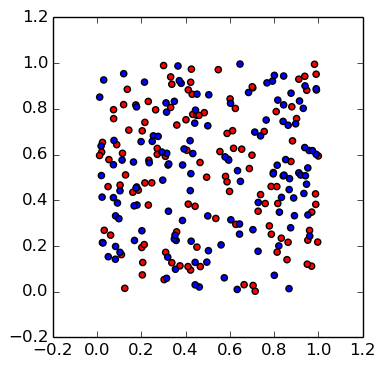

In [14]:
pop1 = initPop()
plotPop(pop1);        

# Implementation of Schelling's "Preference Algorithm"

In [17]:
# Returns true if among nearest neighbours at least bias is of same "flavor" 
function isHappy(bob,population,bias = 0.5, nNN=10)
    NN = []
    distance = []
    for (i,other) in enumerate(population)
        push!(distance,sqrt((bob.x - other.x)^2 + (bob.y - other.y)^2))
    end
    
    closest = sortperm(distance)
    
    avg = 0
    for i = 1:nNN
        avg+= (population[closest[i+1]].flavor == bob.flavor)
    end
    if avg/nNN >= bias
        #println(avg)
        return true
    else 
        #println(avg)
        return false
    end        
end

# Relocates indivuals such that they are happy.
function anneal!(pop,bias)
    for person in pop
        while true
            if isHappy(person,pop,bias)==true
                break
            else
                person.x = rand()
                person.y = rand()
            end
        end
    end
end

anneal! (generic function with 1 method)

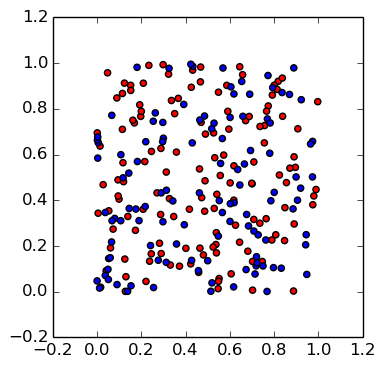

In [18]:
pop2 = initPop()
plotPop(pop2);

#For bias = 0.2, we get following segregation (~steady state)

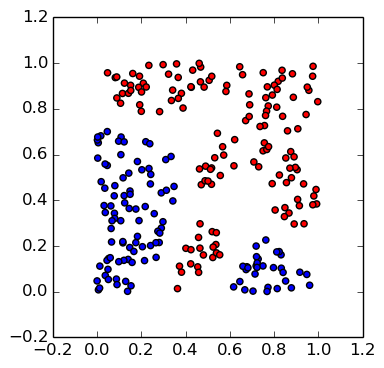

In [28]:
pop2 = initPop()
for i  = 1:10
    anneal!(pop2,0.2)
end
plotPop(pop2);

#For bias = 0.4, we get the following segregation (~steady state)

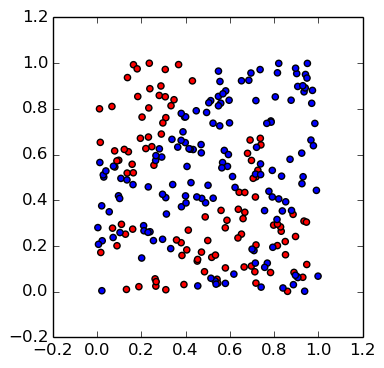

In [41]:
pop4 = initPop()
for i  = 1:10
    anneal!(pop4,0.4)
end
plotPop(pop4);

#For bias = 0.5, we get the following segregation (~steady state)

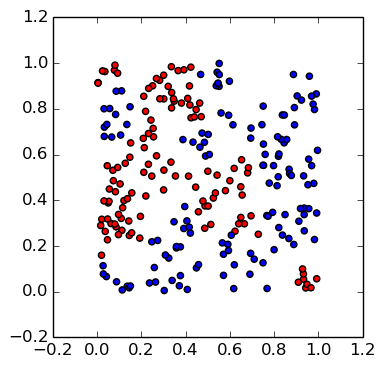

In [42]:
pop5 = initPop()
for i  = 1:10
    anneal!(pop5,0.5)
end
plotPop(pop5);

#For bias = 0.8, we get the following segregation (~steady state)

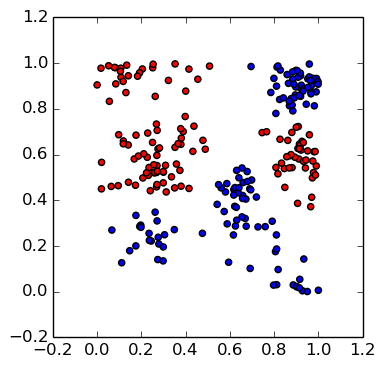

In [36]:
pop8 = initPop()
for i  = 1:10
    anneal!(pop8,0.8)
end
plotPop(pop8);